In [28]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [29]:
#BATCH_SIZE = 8
BATCH_SIZE = 32 
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [11]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Potato dataset",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [12]:
len(dataset)

68

In [13]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [14]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


# Practice

# Visualize some of the images from our dataset

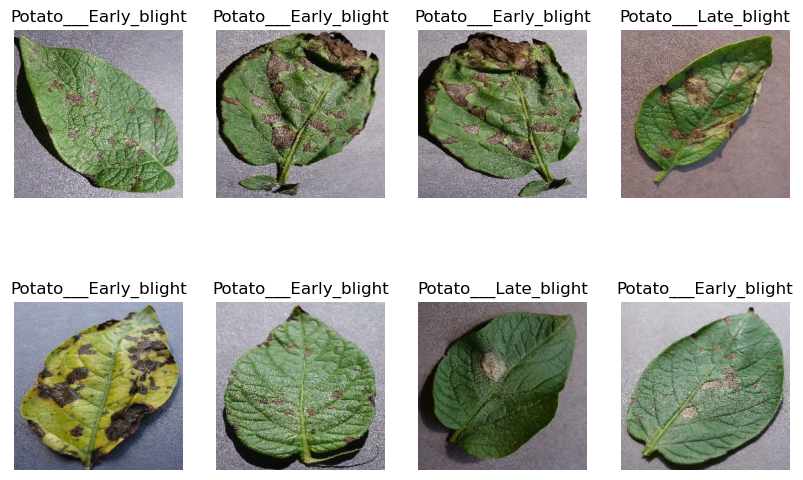

In [11]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(8):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# Divide the Dataset 

In [12]:
image_count=len(dataset)

In [13]:
train_size = int(image_count*0.8)
train_ds = dataset.take(train_size)
test_ds = dataset.skip(train_size)

In [14]:
print(len(train_ds))
print(len(test_ds))

54
14


# Split the level from the dataset

In [15]:
'''# Function For getting Levels 
def get_label(file_path):
    import os
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2]''''''

SyntaxError: incomplete input (1551446782.py, line 5)

In [ ]:
''''# Fuction For X train , Y Train 
def process_image(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path) # load the raw data from the file as a string
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [256, 256])
    return img, label'''

In [ ]:
import pandas as pd 

In [ ]:
''''li=np.array([[]])
for image_batch,labels_batch in dataset:
    li=labels_batch.numpy()''''''

In [ ]:
'y = np.array([]) 

In [ ]:
'x=np.array(range(55))

In [ ]:
'x

In [ ]:
'print(y)

In [ ]:
''''for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

In [ ]:
''''for label in train_ds.take(1):
    print("****",label)

In [ ]:
''''train_ds = train_ds.map(process_image)
test_ds = test_ds.map(process_image)

# Practice done 


# Resizing and Normalization

In [16]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

# Augmenttion

In [17]:
data_augmentation= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomContrast(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
])

In [18]:
# Data augmentation Only on Train data
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# Model Building 


In [19]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'), #sigmoid
])

model.build(input_shape=input_shape)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

# Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=test_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 260s 5s/step - loss: 0.9190 - accuracy: 0.4653 - val_loss: 0.8410 - val_accuracy: 0.6486
Epoch 2/50
54/54 [==============================] - 248s 5s/step - loss: 0.7427 - accuracy: 0.6337 - val_loss: 0.5923 - val_accuracy: 0.7358
Epoch 3/50
54/54 [==============================] - 3451s 65s/step - loss: 0.5721 - accuracy: 0.7500 - val_loss: 0.4873 - val_accuracy: 0.7665
Epoch 4/50
54/54 [==============================] - 14377s 271s/step - loss: 0.3903 - accuracy: 0.8316 - val_loss: 0.3597 - val_accuracy: 0.8491
Epoch 5/50
54/54 [==============================] - 240s 4s/step - loss: 0.3009 - accuracy: 0.8814 - val_loss: 0.2964 - val_accuracy: 0.8561
Epoch 6/50
54/54 [==============================] - 220s 4s/step - loss: 0.2719 - accuracy: 0.8918 - val_loss: 0.2539 - val_accuracy: 0.9127
Epoch 7/50
54/54 [==============================] - 214s 4s/step - loss: 0.2681 - accuracy: 0.8993 - val_loss: 0.2798 - val_accuracy: 0.8868
Epoch 8

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

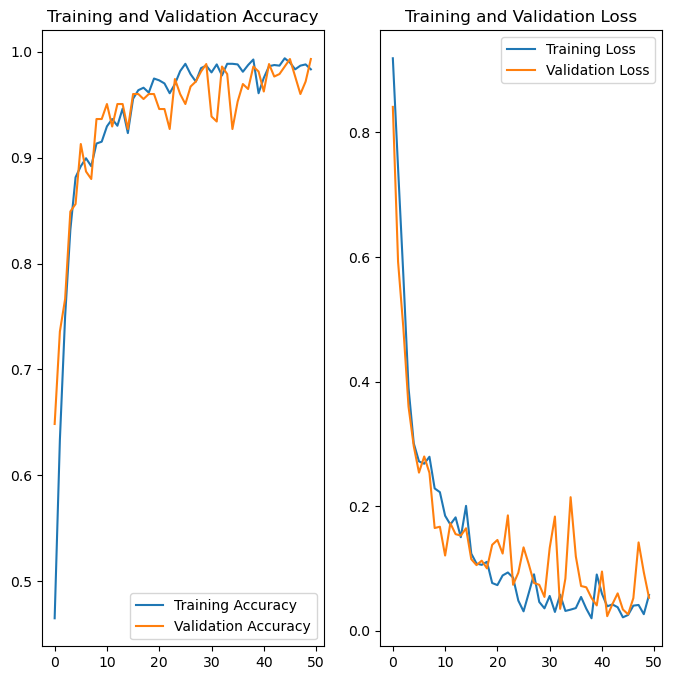

In [27]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
scores = model.evaluate(test_ds)

14/14 [==============================] - 8s 455ms/step - loss: 0.0533 - accuracy: 0.9929


In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [30]:
import numpy as np 

1/1 [==============================] - 0s 35ms/step


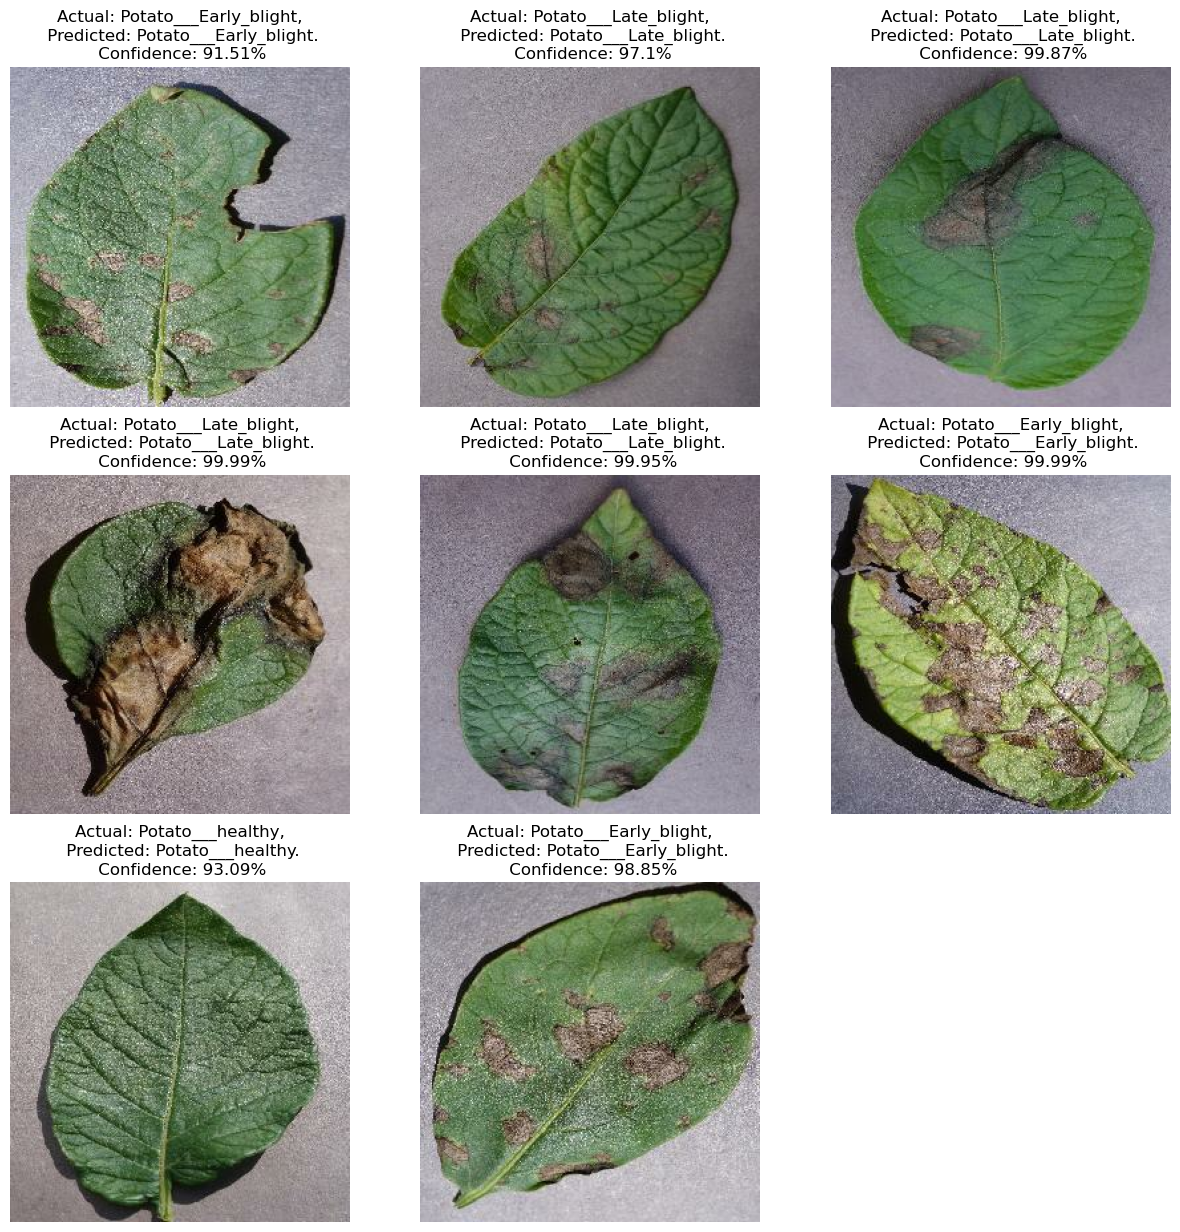

In [31]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

# Practice 


In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class =class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class

In [33]:
y_label_pred=[]
y_label=[]

In [34]:
''''for j in range(55)  
    for images, labels in test_ds.take(j):
          for i in range(8):
                    y_label_pred.append(predict(model, images[i].numpy()))
                    y_label.append(class_names[labels[i]])

SyntaxError: expected ':' (1225552447.py, line 1)

In [48]:
len(test_ds)

14

In [49]:
for j in range (14):
      for images, labels in test_ds.take(j):
            for i in range(32):
                y_label_pred.append(predict(model, images[i].numpy()))
                y_label.append(class_names[labels[i]])

1/1 [==============================] - 0s 86ms/step


In [50]:
print(y_label)
print(y_label_pred)

['Potato___Late_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___Late_blight', 'Potato___Late_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Potato___Late_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___Late_blight', 'Potato___Late_blight', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Potato___Late_blight', 'Potato___healthy', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___Late_blight', 'Potato___Early_blight', 'Potato

In [51]:
import pandas as pd
y_pred =pd.DataFrame(y_label_pred,columns=['predicted value'])
y_actual=pd.DataFrame(y_label,columns=['Actual value'])
print(y_pred,y_actual)

            predicted value
0      Potato___Late_blight
1     Potato___Early_blight
2     Potato___Early_blight
3     Potato___Early_blight
4      Potato___Late_blight
...                     ...
3355   Potato___Late_blight
3356   Potato___Late_blight
3357       Potato___healthy
3358   Potato___Late_blight
3359       Potato___healthy

[3360 rows x 1 columns]                Actual value
0      Potato___Late_blight
1     Potato___Early_blight
2     Potato___Early_blight
3     Potato___Early_blight
4      Potato___Late_blight
...                     ...
3355   Potato___Late_blight
3356   Potato___Late_blight
3357       Potato___healthy
3358   Potato___Late_blight
3359       Potato___healthy

[3360 rows x 1 columns]


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_actual, y_pred))

                       precision    recall  f1-score   support

Potato___Early_blight       1.00      0.99      1.00      1587
 Potato___Late_blight       0.99      0.99      0.99      1566
     Potato___healthy       0.97      1.00      0.99       207

             accuracy                           0.99      3360
            macro avg       0.99      1.00      0.99      3360
         weighted avg       0.99      0.99      0.99      3360

